## __Advanced Statistics with Python Solution__
## Step 1: Import the Required Libraries and Configure Settings

- Import yfinance, matplotlib.pyplot, seaborn, and warnings libraries
- Configure warnings and matplotlib settings


In [ ]:
# Import libraries
import yfinance as yahooFinance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Step 2: Fetch Stock Data and Display Basic Information

Fetch the 5 years of Google stock data using yfinance


In [ ]:
google = yahooFinance.Ticker('GOOG')

In [ ]:
df = google.history('5Y')

Display the head and tail of the data

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-05-10 00:00:00-04:00,54.301498,55.021999,54.282001,54.878502,28860000,0.0,0.0
2018-05-11 00:00:00-04:00,54.680000,55.066502,54.545502,54.912998,25074000,0.0,0.0
2018-05-14 00:00:00-04:00,55.000000,55.537498,54.955502,55.009998,30362000,0.0,0.0
2018-05-15 00:00:00-04:00,54.500000,54.502499,53.673500,53.961498,29898000,0.0,0.0
2018-05-16 00:00:00-04:00,53.865501,54.463501,53.813000,54.088501,21946000,0.0,0.0


In [ ]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-03 00:00:00-04:00,106.220001,108.129997,105.620003,106.120003,17116300,0.0,0.0
2023-05-04 00:00:00-04:00,106.160004,106.300003,104.699997,105.209999,19780600,0.0,0.0
2023-05-05 00:00:00-04:00,105.320000,106.440002,104.738998,106.214996,20705300,0.0,0.0
2023-05-08 00:00:00-04:00,105.794998,108.419998,105.790001,108.239998,17266000,0.0,0.0
2023-05-09 00:00:00-04:00,108.779999,110.595001,107.724998,107.940002,24761800,0.0,0.0


Check the shape of the data

In [ ]:
df.shape

(1258, 7)

**Observation:**

- The dataset has 1258 rows and 7 columns.

Let's describe the data.

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.000000
mean,89.102457,90.134271,88.151700,89.161774,3.037629e+07,0.0,0.015898
std,30.205123,30.505543,29.867724,30.175979,1.316749e+07,0.0,0.563884
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000
25%,60.295499,60.912024,59.960751,60.370875,2.193050e+07,0.0,0.000000
50%,85.512001,86.800125,84.414997,86.413002,2.711800e+07,0.0,0.000000
75%,113.282623,114.807499,112.140499,113.340628,3.427700e+07,0.0,0.000000
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000


Let's check the overview of closing price before calculating DMAs.

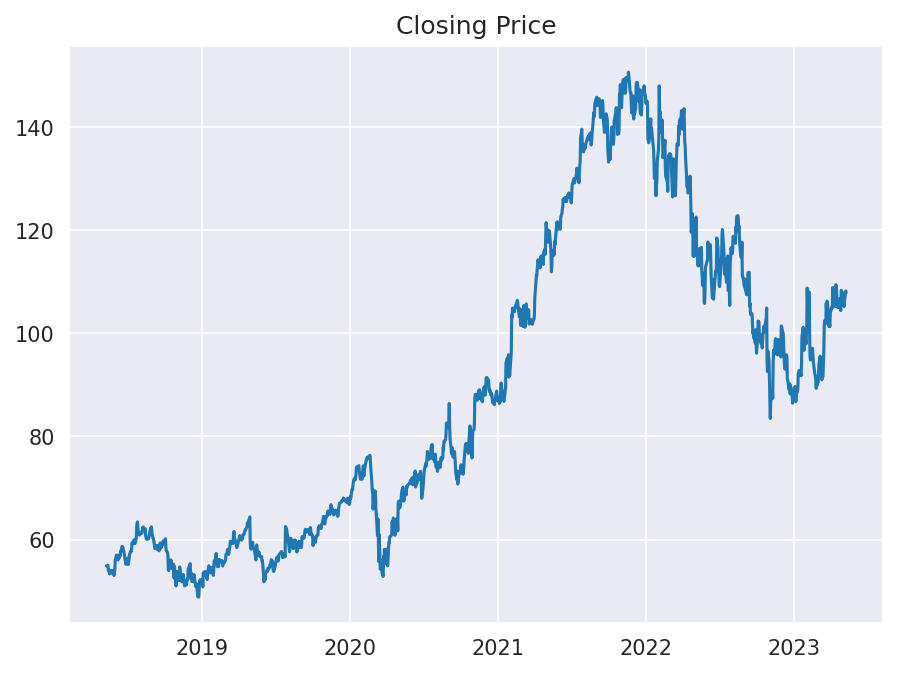

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (7,5),dpi = 150)
plt.title('Closing Price')
plt.plot(df['Close'])

## Step 3: Calculate Moving Averages and Update the Dataset

Let's calculate the 50DMA and 200DMA (day moving averages).

In [ ]:
df['fiftyDMA'] = df['Close'].rolling(50).mean()

In [ ]:
df['thDMA'] = df['Close'].rolling(200).mean()

Descibe the data again

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,thDMA
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.000000,1209.000000,1059.000000
mean,89.102457,90.134271,88.151700,89.161774,3.037629e+07,0.0,0.015898,89.518335,91.231236
std,30.205123,30.505543,29.867724,30.175979,1.316749e+07,0.0,0.563884,29.971359,29.377053
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000,52.442220,55.768365
25%,60.295499,60.912024,59.960751,60.370875,2.193050e+07,0.0,0.000000,60.347660,63.230139
50%,85.512001,86.800125,84.414997,86.413002,2.711800e+07,0.0,0.000000,83.767169,85.772372
75%,113.282623,114.807499,112.140499,113.340628,3.427700e+07,0.0,0.000000,113.763150,118.893039
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000,146.183850,139.273730


**Inferences from summary**:
- There are not many valid rows for __Dividends__ and __Stock Splits__, so let's remove these columns from the original dataset.

Drop __Dividends__ and __Stock Splits__ columns

In [ ]:
df.drop(columns = ['Dividends','Stock Splits'],inplace = True)

Print the head of the dataset

In [ ]:
df.head()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
Date,,,,,,,
2018-05-10 00:00:00-04:00,54.301498,55.021999,54.282001,54.878502,28860000,NaN,NaN
2018-05-11 00:00:00-04:00,54.680000,55.066502,54.545502,54.912998,25074000,NaN,NaN
2018-05-14 00:00:00-04:00,55.000000,55.537498,54.955502,55.009998,30362000,NaN,NaN
2018-05-15 00:00:00-04:00,54.500000,54.502499,53.673500,53.961498,29898000,NaN,NaN
2018-05-16 00:00:00-04:00,53.865501,54.463501,53.813000,54.088501,21946000,NaN,NaN


**Observations**:
- While calculating the moving average, the dataset displays NaN values in the __fiftyDMA1__ and __thDMA__ columns.
- Moving average is calculated for first 50 rows in __fiftyDMA__ column, so for first 50 rows value would be __NaN__ in that column.
- Moving average is calculated for first 200 rows in __thDMA__ column, so for first 200 rows value would be __NaN__ in that column.

In [ ]:
df.tail()

,Open,High,Low,Close,Volume,fiftyDMA,thDMA
Date,,,,,,,
2023-05-03 00:00:00-04:00,106.220001,108.129997,105.620003,106.120003,17116300,101.1980,101.153000
2023-05-04 00:00:00-04:00,106.160004,106.300003,104.699997,105.209999,19780600,101.4662,101.105950
2023-05-05 00:00:00-04:00,105.320000,106.440002,104.738998,106.214996,20705300,101.7691,101.063525
2023-05-08 00:00:00-04:00,105.794998,108.419998,105.790001,108.239998,17266000,102.1469,101.029525
2023-05-09 00:00:00-04:00,108.779999,110.595001,107.724998,107.940002,24761800,102.5037,101.027425


## Step 4: Plot the Closing Price, 50DMA, and 200DMA

Plot the graph between closing price vs. 50DMA vs. 200DMA


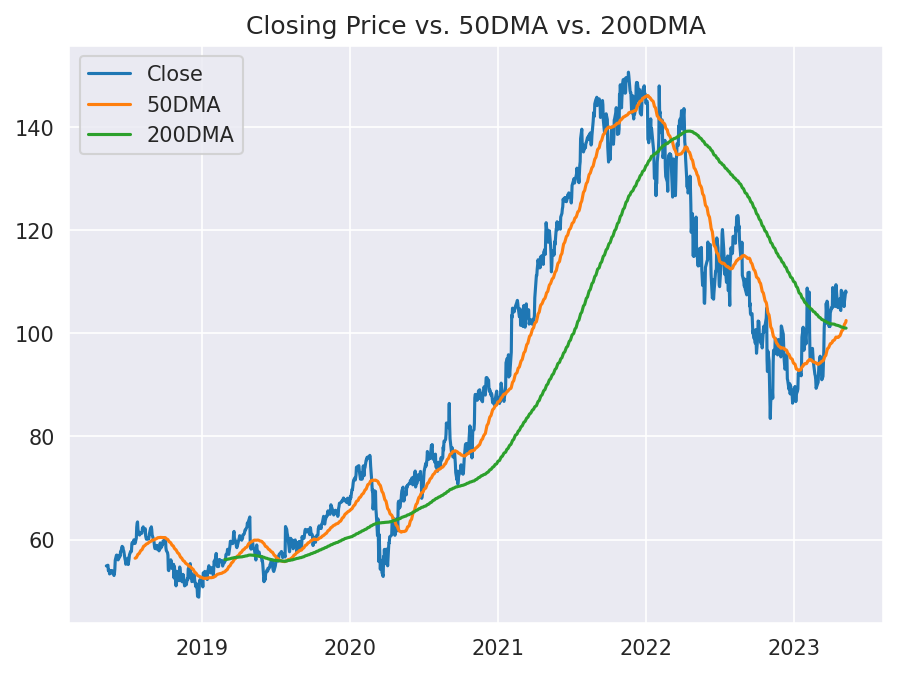

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (7,5), dpi = 150)
plt.title('Closing Price vs. 50DMA vs. 200DMA')
plt.plot(df['Close'],label = 'Close')
plt.plot(df['fiftyDMA'],label = '50DMA')
plt.plot(df['thDMA'], label = '200DMA')
plt.legend()

**Inferences from the above graph:**
1. 50DMA and 200DMA are fairly good indicators of how the stock is moving.
2. If the closing price is above the 50DMA or 200DMA, it is usually on the uptrend.
3. If the closing price is below the 50DMA or 200DMA, it usually means that it is in a downward trend.
4. Every point where 50DMA and 200DMA intersect, the market usually reverses its trend ( High -> Low | Low -> High )
5. The huge dip in March 2020 indicates the Covid-19 market crash.

# Finding the Possible Futuristic Movement of the Stock

## Step 5: Analyze the Correlation Between Variables and Plot Distributions

Create a heatmap to analyze the correlation between variables

<Axes: >

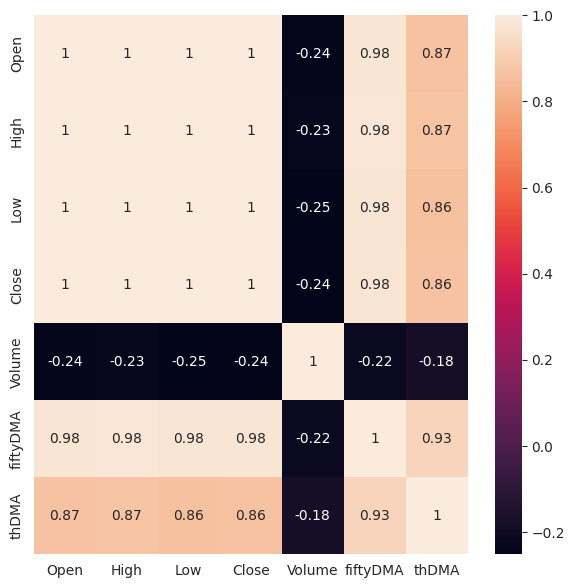

In [ ]:
plt.figure(figsize=(7,7),dpi = 100)
sns.heatmap(df.corr(),annot = True )

**Observations**:
1. Closing price has a very high correlation with almost all the variables except the volume.
2. There is strong multicollinearity between the variables as well.

Plot distribution plots of 50DMA

<Axes: title={'center': 'Distplot 50 DMA'}, xlabel='fiftyDMA', ylabel='Density'>

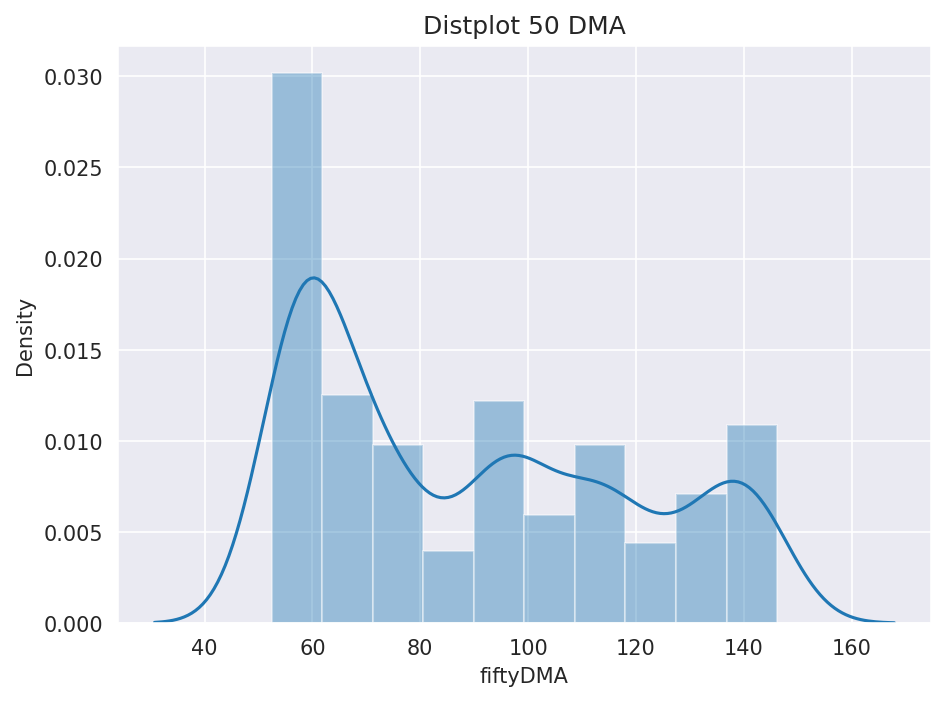

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,5),dpi = 150)
plt.title('Distplot 50 DMA')
sns.distplot(df['fiftyDMA'])

Plot distplot of the close price

<Axes: title={'center': 'Distplot of Close Price'}, xlabel='Close', ylabel='Density'>

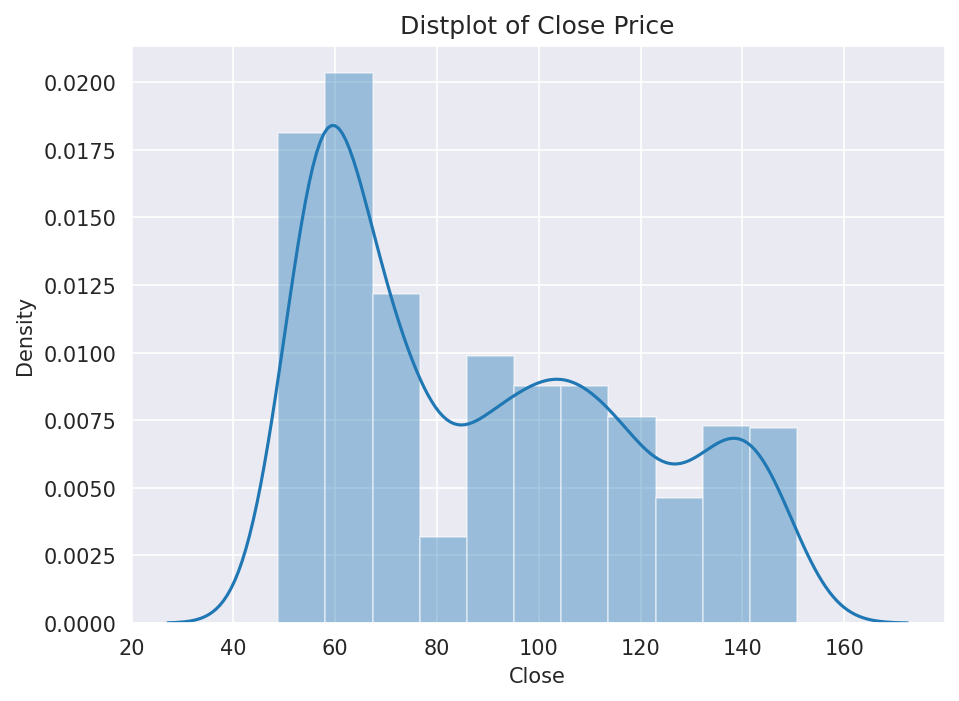

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,5),dpi = 150)
plt.title('Distplot of Close Price')
sns.distplot(df['Close'])

****Observations****:

- Both plot __50DMA__ and __Closed Price__ follow same distribution.

## Step 6: Fit a Linear Model


- Display the model summary

Import statsmodel package


In [ ]:
import statsmodels.formula.api as smf

Fit a linear model using 50DMA as a predictor

- **Note:** Although 200DMA has a high correlation with close price and it is also closely related to 50 DMA, we have not used it for our model since we need to avoid multicollinearity when picking features for our dataset.

In [ ]:
model = smf.ols(formula = 'Close ~ fiftyDMA', data = df)
model = model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 4.338e+04
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:13:33   Log-Likelihood:                -7369.0
No. Observations:                1211   AIC:                         1.474e+04
Df Residuals:                    1209   BIC:                         1.475e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.7375      8.188      4.120      0.000      17.673      49.802
fiftyDMA       0.9966      0.005    208.268      0.000       0.987       1.006
==============================================================================
Omnibus:                      162.198   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.747
Skew:                          -0.843   Prob(JB):                     9.92e-65
Kurtosis:                       4.732   Cond. No.                     4.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations**:
1. The R-squared is 0.973, which means the line fits very well.
1. The coef is also good.
2. Since the target variable and feature variable are very highly correlated, ~ 1, it isn't wise to fit the model based on the parameters in real life.

## Step 7: Plot Closing Price vs. 50DMA vs. 200DMA Again




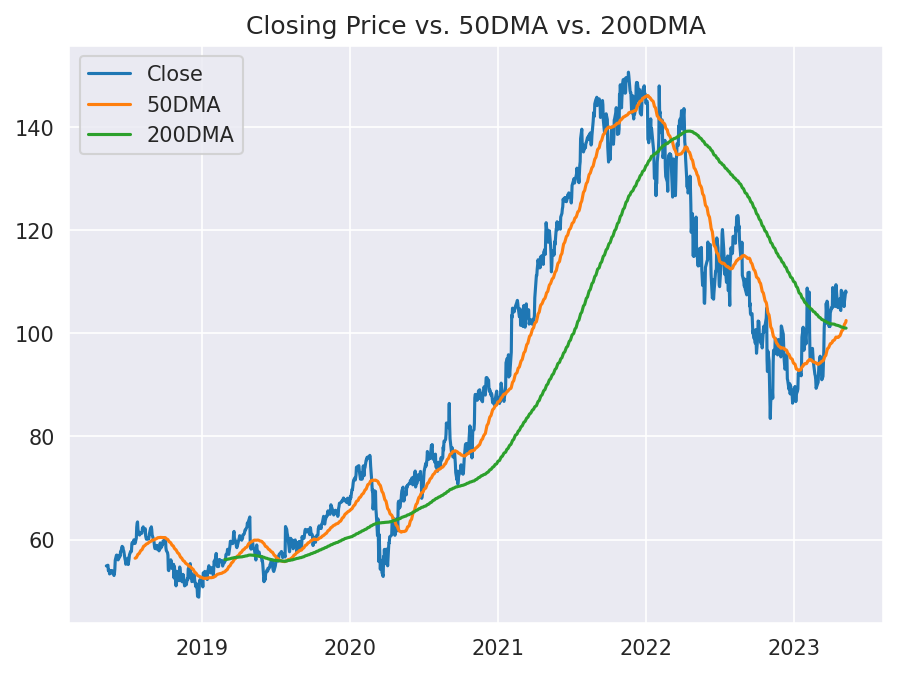

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,5),dpi = 150)
plt.title('Closing Price vs. 50DMA vs. 200DMA')
plt.plot(df['Close'],label = 'Close')
plt.plot(df['fiftyDMA'],label = '50DMA')
plt.plot(df['thDMA'], label = '200DMA')
plt.legend()

**Observations**:
- In the year 2022, the closing price is below 50DMA and 200DMA, so prices will continue to fall.
- In the end, closing prices increase dramatically, meaning that 50DMA and 200DMA will change over time as a result.
- Based on the graph, it seems unlikely that the price will fall very steeply due to a little resistance to the price.